In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/train_set_label.csv")

In [3]:
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,...,b,b,b,b,b,b,b,b,b,loss
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,loss
2,x,x,o,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,b,b,win
4,x,x,o,o,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50667 entries, 0 to 50666
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      50667 non-null  object
 1   a2      50667 non-null  object
 2   a3      50667 non-null  object
 3   a4      50667 non-null  object
 4   a5      50667 non-null  object
 5   a6      50667 non-null  object
 6   b1      50667 non-null  object
 7   b2      50667 non-null  object
 8   b3      50667 non-null  object
 9   b4      50667 non-null  object
 10  b5      50667 non-null  object
 11  b6      50667 non-null  object
 12  c1      50667 non-null  object
 13  c2      50667 non-null  object
 14  c3      50667 non-null  object
 15  c4      50667 non-null  object
 16  c5      50667 non-null  object
 17  c6      50667 non-null  object
 18  d1      50667 non-null  object
 19  d2      50667 non-null  object
 20  d3      50667 non-null  object
 21  d4      50667 non-null  object
 22  d5      50667 non-null

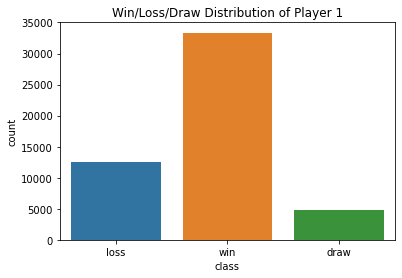

In [5]:
sns.countplot(x="class",data=df)
plt.title('Win/Loss/Draw Distribution of Player 1')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [7]:
df = pd.get_dummies(df)

In [8]:
X = df.drop("class", axis=1)
y = df["class"]

In [9]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score #accuracy_score, confusion_matrix, classification_report

In [11]:
def make_predictions(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    print(f'Weighted F1 Score for {name} is: ', f1_score(y_dev, y_pred, average='weighted'))

In [185]:
xgb = XGBClassifier(n_estimators=500,
                    subsample=0.7,
                    colsample_bytree=0.8,
                    use_label_encoder=False,
                    random_state=10,
                    verbosity=0)
make_predictions(xgb, "XGB")

Weighted F1 Score for XGB is:  0.8505504243791974


In [14]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/test_set_label.csv')

In [15]:
test_data = pd.get_dummies(test_data)

In [16]:
target = xgb.predict(test_data)

In [17]:
target = le.inverse_transform(target)

In [18]:
target

array(['loss', 'win', 'win', ..., 'win', 'win', 'win'], dtype=object)

In [19]:
res = pd.DataFrame(target) 
res.columns = ["prediction"]
res.to_csv("submission.csv", index = False) 